<a href="https://colab.research.google.com/github/jach999/fairtrack/blob/master/fairtrack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [10]:
!nvidia-smi

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/bin/bash: line 1: nvidia-smi: command not found


## Copy repository and install dependencies

In [22]:
!git clone https://github.com/jach999/fairtrack.git
%cd fairtrack
!mkdir runs

Cloning into 'fairtrack'...
remote: Enumerating objects: 245, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 245 (delta 76), reused 100 (delta 30), pack-reused 72
Receiving objects: 100% (245/245), 345.27 MiB | 34.58 MiB/s, done.
Resolving deltas: 100% (84/84), done.
Updating files: 100% (51/51), done.


In [15]:
!pip install -r requirements.txt

After restarting the session, continue here with the installation of ByteTrack

In [24]:
%cd fairtrack
!python install_bytetrack.py

[Errno 2] No such file or directory: 'fairtrack'
/content/fairtrack
Cloning into 'ByteTrack'...
remote: Enumerating objects: 2007, done.
remote: Total 2007 (delta 0), reused 0 (delta 0), pack-reused 2007
Receiving objects: 100% (2007/2007), 79.60 MiB | 32.03 MiB/s, done.
Resolving deltas: 100% (1141/1141), done.
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Could not find a version that satisfies the requirement onnxruntime==1.8.0 (from versions: 1.12.0, 1.12.1, 1.13.1, 1.14.0, 1.14.1, 1.15.0, 1.15.1, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.17.0, 1.17.1)
ERROR: No matching distribution found for onnxruntime==1.8.0
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!


## Test the script

Let's start to process an image

test_assets/images/7.jpg runs/7.jpg_test.jpg
/content/fairtrack
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

0: 608x800 1 insect, 798.0ms
Speed: 4.7ms preprocess, 798.0ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 800)
insect #1 detected in Inside polygon
Data written to /content/fairtrack/runs/7.jpg_test_log.csv
Image shape: (600, 800, 3)


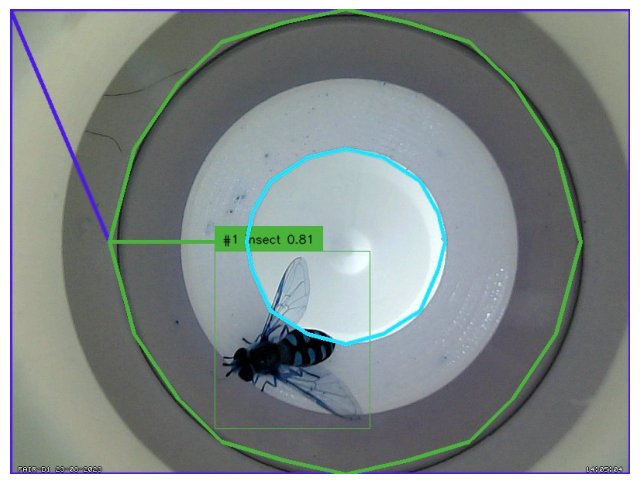

In [25]:
import os
import cv2
import matplotlib.pyplot as plt

# Define source and target image paths
source_img_path = "test_assets/images/7.jpg"
source_img_filename = os.path.basename(source_img_path)
target_img_path = os.path.join("runs", f"{source_img_filename}_test.jpg")
print(source_img_path, target_img_path)

#run the script
!python fairtrack_test_image.py $source_img_path $target_img_path

# Load the processed image
img = cv2.imread(target_img_path)
print(f"Image shape: {img.shape}")
# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

Now, let's try with a whole video

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import moviepy.editor

# Define source and target image paths
source_vid_path = "test_assets/fdV2_5/fd1/11-17-18.mp4"
source_vid_filename = os.path.basename(source_vid_path)
target_vid_path = os.path.join("runs", f"{source_vid_filename}_test.mp4")
print(source_vid_path, target_vid_path)

#run the script
!python fairtrack_test_video.py $source_vid_path $target_vid_path


# Display the processed video
moviepy.editor.ipython_display(target_vid_path, embed=True)


test_assets/fdV2_5/fd1/11-17-18.mp4 runs/11-17-18.mp4_test.mp4
/content/fairtrack
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
frame 0

WARNING ⚠️ imgsz=[800, 600] must be multiple of max stride 32, updating to [800, 608]
0: 480x608 1 insect, 788.8ms
Speed: 5.7ms preprocess, 788.8ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 608)
insect #1 detected in Entrance polygon
Data written to /content/fairtrack/runs/11-17-18.mp4_test_log.csv
frame 1

WARNING ⚠️ imgsz=[800, 600] must be multiple of max stride 32, updating to [800, 608]
0: 480x608 1 insect, 499.6ms
Speed: 1.2ms preprocess, 499.6ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 608)
insect #1 detected in Entrance polygon
Data written to /content/fairtrack/runs/11-17-18.mp4_test_log.csv
frame 2

WARNING ⚠️ imgsz=[800, 600] must be multiple of max stride 32, updating to [800, 608]
0: 480x608 1 insect, 449.9ms
Speed: 1.1ms preprocess, 449.9ms inference, 1.0ms postproce

Display the processed video

In [ ]:
import moviepy.editor

# Read the video file
video_path = '/content/fairtrack/runs/run2/11-17-18_test.mp4'

# Display the video
moviepy.editor.ipython_display(video_path, embed=True)